In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [8]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [9]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 92s 1us/step


In [11]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [34]:
classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

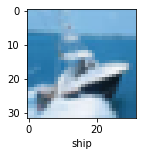

In [37]:
def plot_sample(X, y, index):
    plt.figure(figsize=(2,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index][0]])
    plt.show()
plot_sample(X_train, y_train, 8)

In [38]:
X_train = X_train / 255
X_test = X_test / 255

In [47]:
y_train = y_train.reshape(-1,)

In [54]:
model = keras.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(units=3000, activation='relu'),
    layers.Dense(units=1000, activation='relu'),
    layers.Dense(units=10, activation='sigmoid')
])

model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.8114 - accuracy: 0.3522
Epoch 2/5
1563/1563 [==============================] - 75s 48ms/step - loss: 1.6248 - accuracy: 0.4255
Epoch 3/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5412 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4846 - accuracy: 0.4763
Epoch 5/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4346 - accuracy: 0.4934


In [56]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.5375 - accuracy: 0.4587


[1.537523865699768, 0.4587000012397766]

In [62]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

In [63]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.37      0.61      0.46      1000
           1       0.57      0.56      0.57      1000
           2       0.48      0.17      0.25      1000
           3       0.40      0.20      0.27      1000
           4       0.43      0.45      0.44      1000
           5       0.46      0.28      0.35      1000
           6       0.59      0.45      0.51      1000
           7       0.50      0.57      0.54      1000
           8       0.40      0.79      0.53      1000
           9       0.52      0.50      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.44     10000
weighted avg       0.47      0.46      0.44     10000



### Starting convolution modelling process

#### Model using two CNN's

In [74]:
model = keras.Sequential([
    
    #cnn layers
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense network
    layers.Flatten(),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [76]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.8559 - accuracy: 0.3334
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5241 - accuracy: 0.4570
Epoch 3/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.3755 - accuracy: 0.5096
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.2738 - accuracy: 0.5497
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1968 - accuracy: 0.5806
Epoch 6/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1366 - accuracy: 0.6050
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0813 - accuracy: 0.6240
Epoch 8/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.0328 - accuracy: 0.6413
Epoch 9/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9909 - accuracy: 0.6560
Epoch 10/10
1563/1563 [==============================] - 39s 25m

#### Model using 3 CNN's

In [78]:
model = keras.Sequential([
    
    #cnn layers
    layers.Conv2D(filters=32, kernel_size=(4,4), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=16, kernel_size=(4,4), activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense network
    layers.Flatten(),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.6064 - accuracy: 0.4185
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3522 - accuracy: 0.5166
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.2486 - accuracy: 0.5580
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1793 - accuracy: 0.5864
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1240 - accuracy: 0.6066
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.0778 - accuracy: 0.6216
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0411 - accuracy: 0.6331
Epoch 8/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0074 - accuracy: 0.6474
Epoch 9/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9776 - accuracy: 0.6574
Epoch 10/10
1563/1563 [==============================] - 37s 24m